### Get familiar with precipitation data

- Plot raw samples for CESM and FOCI precipitation fields.
- Highlight Sahel zone.

In [20]:
import os
import sys
sys.path.append('../reconstruct_missing_data')

from pathlib import Path
from json import dump, load

# Next block for visualization, only if packages are pre-installed!
import xarray as xr
import hvplot.xarray
import geoviews as gv
import cartopy
import cartopy.crs as ccrs
import cmocean

import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.patches as mpatches

from data_loading import find_data_files, load_data_set

In [2]:
# Set working directory, according to working directory in scripts:
# os.chdir('/gxfs_work1/geomar/smomw511') # nesh
os.chdir('/Users/mlandt-hayen') # local
# os.chdir('/work') # local in Docker Container

### Load data

#### CESM and FOCI

In [3]:
## Prepare CESM and FOCI samples:

# Set path CESM and FOCI test data:
path_to_ESM_test_data = 'GitHub/MarcoLandtHayen/reconstruct_missing_data/data/test_data/'

# Load CESM and FOCI test data:
data_CESM = load_data_set(data_path=path_to_ESM_test_data, data_source_name='CESM')
data_FOCI = load_data_set(data_path=path_to_ESM_test_data, data_source_name='FOCI')

# Get precipitation for CESM and FOCI test data:
prec_CESM = data_CESM['precipitation']
prec_FOCI = data_FOCI['precipitation']


/opt/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [6]:
prec_CESM

<xarray.DataArray 'precipitation' (time: 120, lat: 96, lon: 144)>
[1658880 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 2350-01-16 12:00:00 ... 2359-12-16 12:00:00
    plev     float32 500.0
Attributes:
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    units:         mm/day
    cell_methods:  time: mean

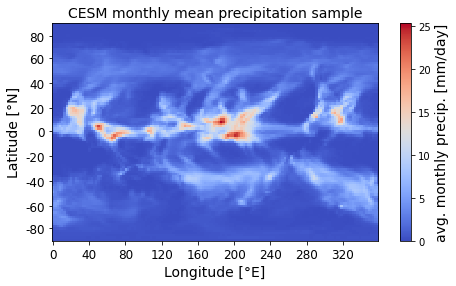

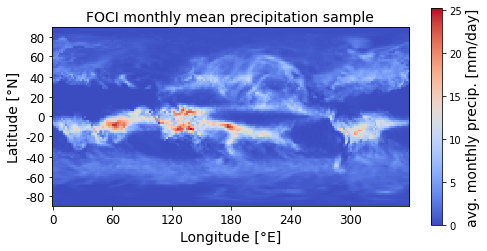

In [17]:
## Plot samples:

# CESM:
fig, ax = plt.subplots(figsize=(8, 4))
im = plt.imshow(prec_CESM[0], cmap="coolwarm", interpolation='nearest')#, vmax=0.003)
cbar = plt.colorbar(im)
cbar.set_label('avg. monthly precip. [mm/day]', fontsize=14)
plt.title('CESM monthly mean precipitation sample', fontsize=14)
plt.xlabel('Longitude [°E]', fontsize=14)
plt.ylabel('Latitude [°N]', fontsize=14)
plt.xticks(np.arange(0, 144, step=16), [0, 40, 80, 120, 160, 200, 240, 280, 320], fontsize=12)
plt.yticks([5, 15, 26, 37, 47, 58, 69, 80, 90], [80, 60, 40, 20, 0, -20, -40, -60, -80], fontsize=12)
plt.show()

# FOCI:
fig, ax = plt.subplots(figsize=(8, 4))
im = plt.imshow(prec_FOCI[0], cmap="coolwarm", interpolation='nearest')#, vmax=0.003)
cbar = plt.colorbar(im)
cbar.set_label('avg. monthly precip. [mm/day]', fontsize=14)
plt.title('FOCI monthly mean precipitation sample', fontsize=14)
plt.xlabel('Longitude [°E]', fontsize=14)
plt.ylabel('Latitude [°N]', fontsize=14)
plt.xticks(np.arange(0, 192, step=32), [0, 60, 120, 180, 240, 300], fontsize=12)
plt.yticks([5, 15, 26, 37, 47, 58, 69, 80, 90], [80, 60, 40, 20, 0, -20, -40, -60, -80], fontsize=12)
plt.show()

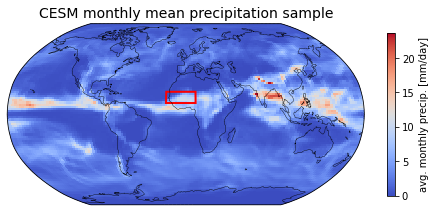

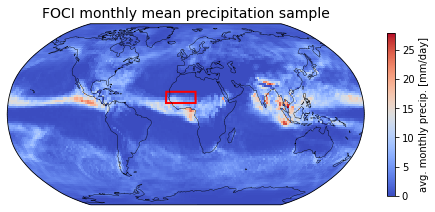

In [37]:
## Plot with Cartopy: Highlight African Sahel region.

# CESM
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=0))#ccrs.PlateCarree(central_longitude=180))#Robinson(central_longitude=180))

# Make the map global and add coastlines
ax.set_global()
ax.coastlines(linewidth=0.4)

# Add mean loss reduction map as heatmap:
prec_CESM[19].plot(
    ax=ax, transform=ccrs.PlateCarree(),
#    vmin=0, vmax=0.004, 
    cmap="coolwarm",
    cbar_kwargs={'shrink': 0.6, 'label': 'avg. monthly precip. [mm/day]'},
)

ax.add_patch(mpatches.Rectangle(xy=[-20, 10], width=30, height=10,
                                facecolor='none', edgecolor='r', lw=2.0,
                                transform=ccrs.PlateCarree()))

plt.title('CESM monthly mean precipitation sample', fontsize=14)
plt.show()

# FOCI
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=0))#ccrs.PlateCarree(central_longitude=180))#Robinson(central_longitude=180))

# Make the map global and add coastlines
ax.set_global()
ax.coastlines(linewidth=0.4)

# Add mean loss reduction map as heatmap:
prec_FOCI[7].plot(
    ax=ax, transform=ccrs.PlateCarree(),
#    vmin=0, vmax=0.004, 
    cmap="coolwarm",
    cbar_kwargs={'shrink': 0.6, 'label': 'avg. monthly precip. [mm/day]'},
)

ax.add_patch(mpatches.Rectangle(xy=[-20, 10], width=30, height=10,
                                facecolor='none', edgecolor='r', lw=2.0,
                                transform=ccrs.PlateCarree()))

plt.title('FOCI monthly mean precipitation sample', fontsize=14)
plt.show()